# Importing the Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas_profiling as pp
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xg
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
%matplotlib inline

In [2]:
#Loading the dataframe with pandas
dataframe = pd.read_csv(r'C:\Users\AKASH\OneDrive\Desktop\Ineuron Intern\archive (7)\insurance.csv')

In [3]:
# Exploring the first five rows of the dataframe
dataframe.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


<AxesSubplot:>

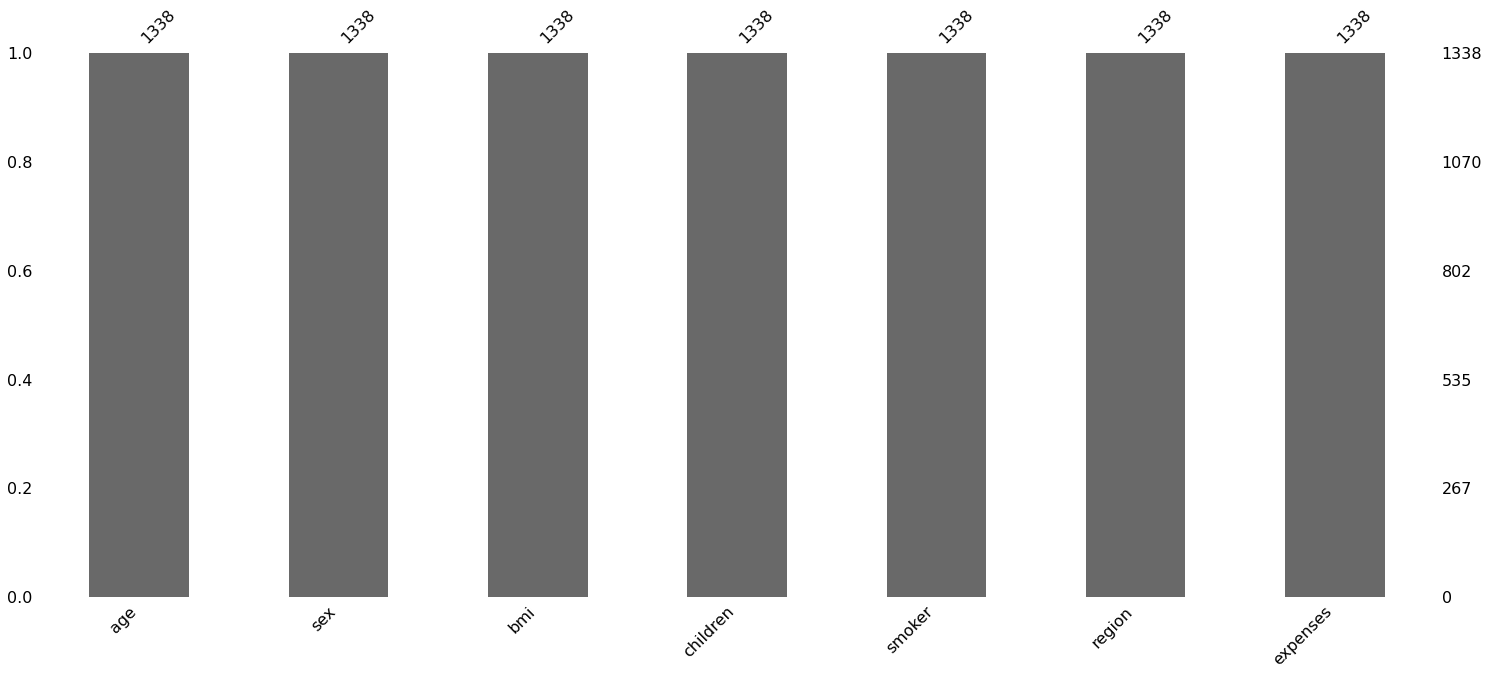

In [4]:
#Checking the null values
msno.bar(dataframe)

Here it is quite evident that there are no missing values in the dataset.

# Exploratory Data Analysis

<AxesSubplot:>

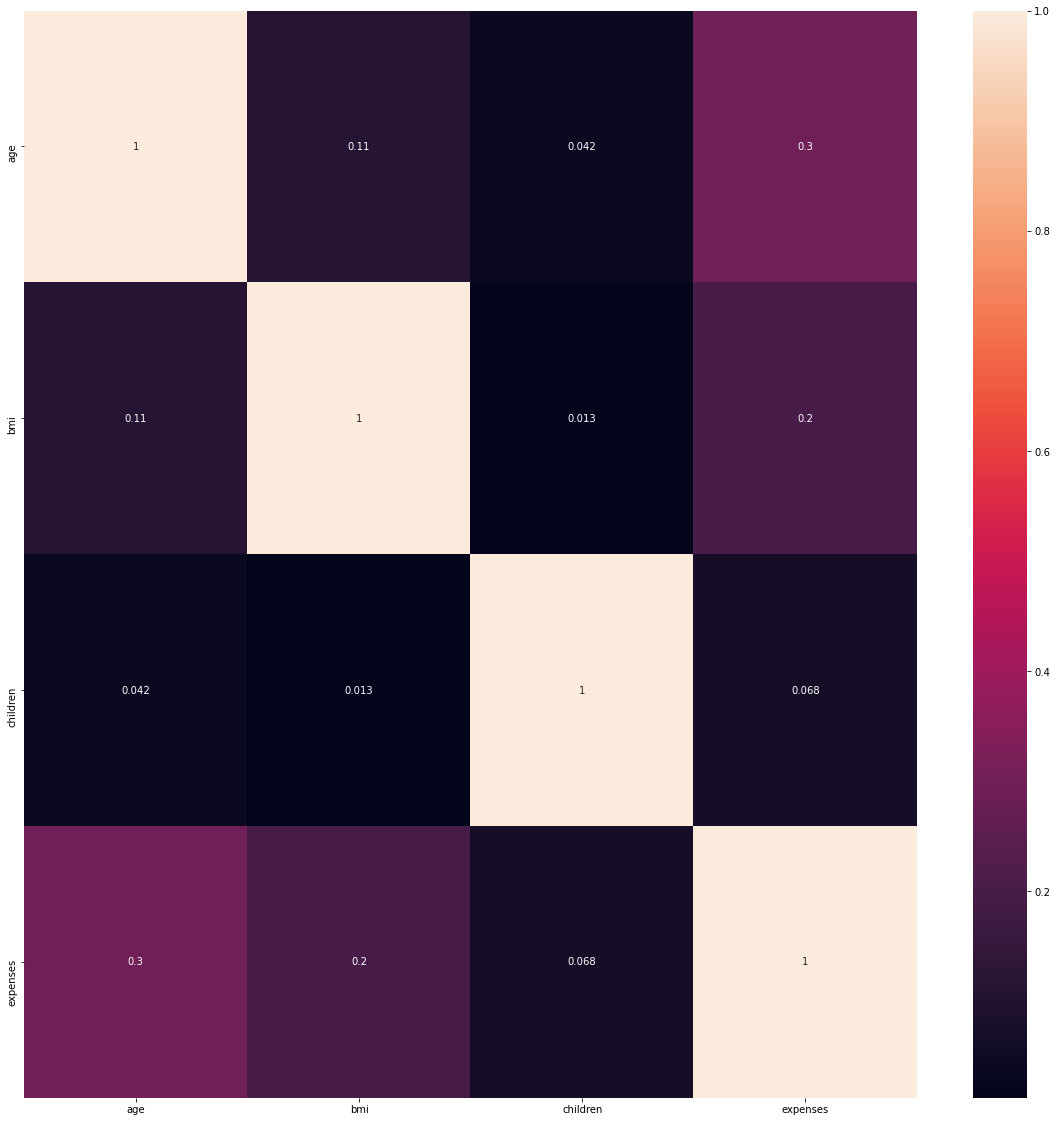

In [5]:
#Plotting Pearson Correlation heatmap
plt.figure(figsize = (20,20))
sns.heatmap(dataframe.corr(),annot = True,)

Here we can see that their is no multi-collinearity in the dataset.

In [6]:
#Checking some stats of the numerical columns
dataframe.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
#Lets find out the obejct columns
categorical_columns = [i for i in dataframe.columns if dataframe[i].dtype == 'object']
categorical_columns

['sex', 'smoker', 'region']

In [8]:
sex_dict = {'female' : 0,'male' : 1}
smoker_dict = {'yes' : 1,'no' : 0}
region_dict = {'northeast' : 0,'northwest' : 1,'southeast' : 2,'southwest' : 3}
dataframe['sex'] = dataframe['sex'].map(sex_dict)
dataframe['smoker'] = dataframe['smoker'].map(smoker_dict)
dataframe['region'] = dataframe['region'].map(region_dict)

In [9]:
dataframe.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


C:\Users\AKASH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKASH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKASH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

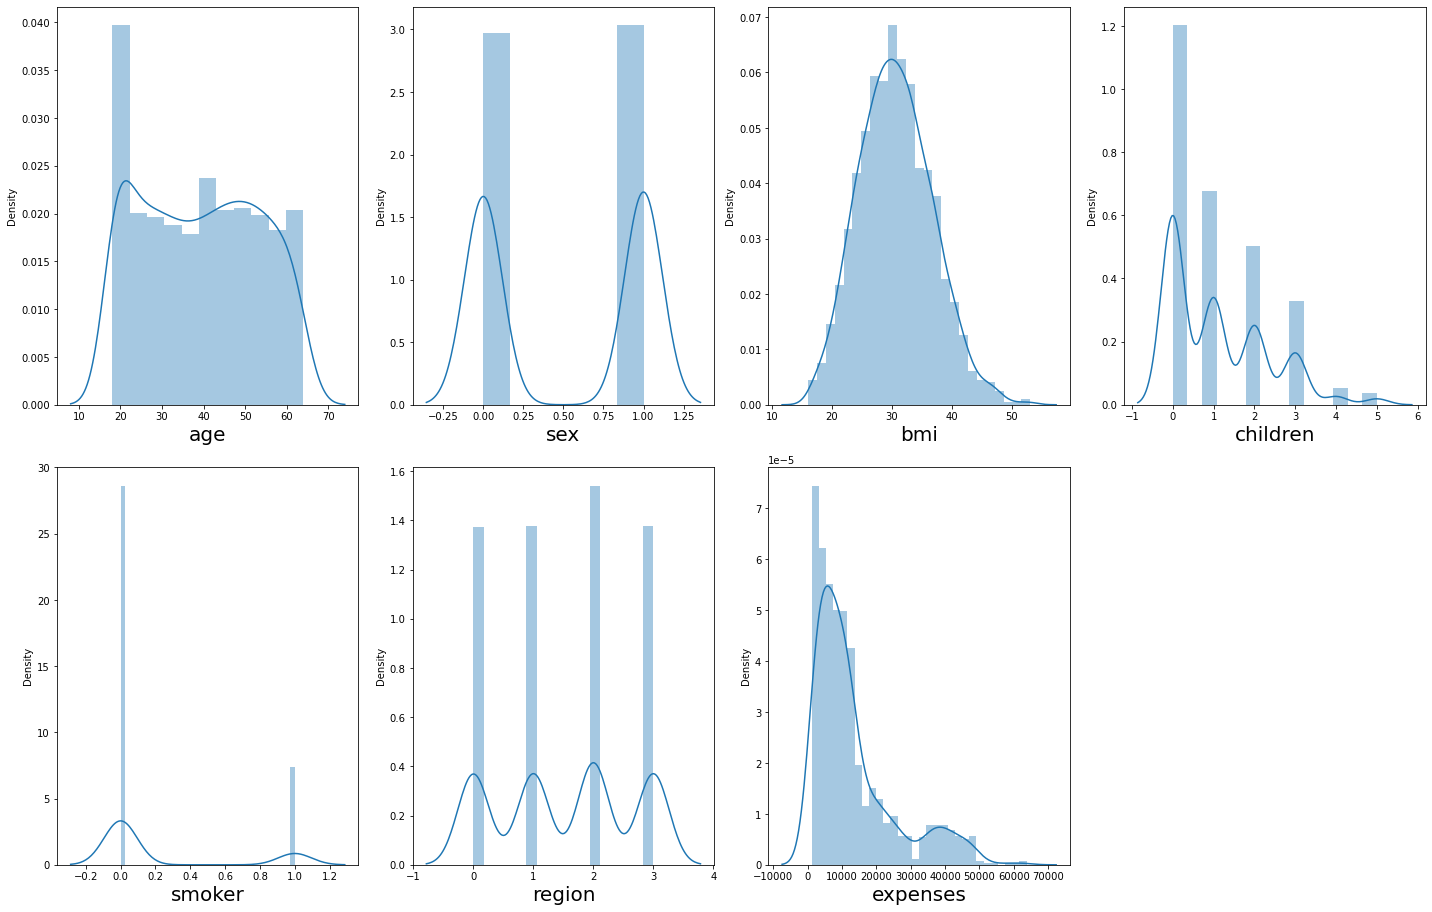

In [10]:
#Checking the distribution of the dataset
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dataframe:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(dataframe[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

The distribution of the dataset looks pretty clean !!

# Bivariate Analysis

<AxesSubplot:xlabel='age', ylabel='expenses'>

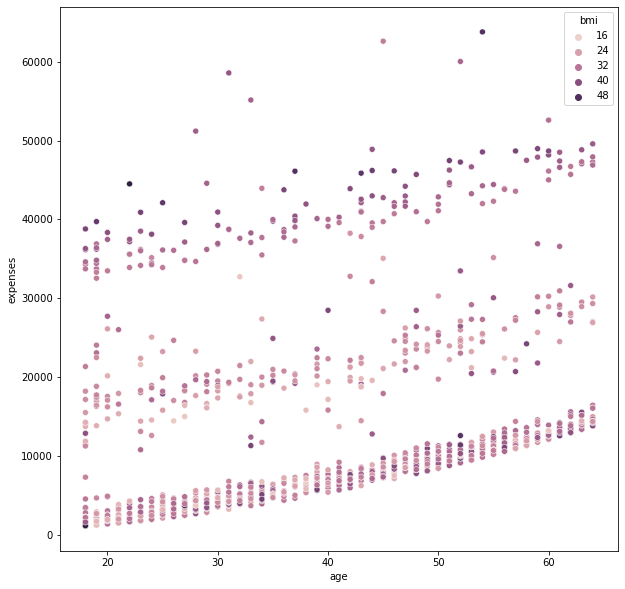

In [11]:
#Effect of age and bmi on expenses
plt.figure(figsize=(10,10), facecolor='white')
sns.scatterplot(data = dataframe,x = 'age',y = 'expenses',hue = 'bmi')

The above graph gives us a trend that on an average as the age increases the bmi increases as well and expense on premium increases as well. So it is adivisable to start a health premium as early as possible when the body is free form any illness.

In [36]:
profile = pp.ProfileReport(dataframe)
profile.to_file("output.html")
profile.to_widgets()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
#Splitting the dataset into X and Y
x = dataframe.drop(columns = 'expenses')
y = dataframe['expenses']

# Model Building

In [13]:
#Initializing an object for Random Forest Regressor and xgboost
random_forest = RandomForestRegressor()
xgboost = xg.XGBRegressor()

In [15]:
#Applying 10 fold cross validation for random forest model and finding its accuracy and standard deviation
kf = KFold(n_splits=10, random_state=None)
result = cross_val_score(random_forest ,x, y, cv = kf)
print("Avg accuracy: {} and standard deviation {}".format(result.mean(),result.std()))

Avg accuracy: 0.8329299023577843 and standard deviation 0.045479428128368464


In [17]:
#Applying 10 fold cross validation for xgboost model and finding its accuracy and standard deviation
kf1 = KFold(n_splits=10, random_state=None)
result1 = cross_val_score(xgboost ,x, y, cv = kf1)
print("Avg accuracy: {} and standard deviation {}".format(result1.mean(),result1.std()))

Avg accuracy: 0.8057467400490648 and standard deviation 0.056282506044973195


From the above accuracy it is clear that random forest is performing better than xgboost in this case so we will move forward with random forest and perform hyperparameter tuning on it

In [42]:
#Hyperparamter Tuning using GridSearch CV
grid_param = {"n_estimators" : [100,200,300,600],"max_depth" : range(2,20,2),
    'min_samples_leaf' : range(1,10,2),
    'min_samples_split': range(2,10,2),
    'max_features' : ['auto','log2']}
grid_search = GridSearchCV(estimator = random_forest,param_grid = grid_param,cv = 5,verbose = 1)
grid_search.fit(x_scaled,y)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 20, 2),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 200, 300, 600]},
             verbose=1)

In [43]:
# Getting the best parameters for the model
grid_search.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 100}

In [18]:
#Initializing the model with the best parameters
random_forest = RandomForestRegressor(max_depth= 4,
 max_features= 'auto',
 min_samples_leaf= 5,
 min_samples_split= 6,
 n_estimators= 100)


In [20]:
#Performing 10 fold cross validation to check the accuracy and standard deviation
kf = KFold(n_splits=10, random_state=None)
result = cross_val_score(random_forest ,x, y, cv = kf)
print("Avg accuracy: {} and standard deviation {}".format(result.mean(),result.std()))

Avg accuracy: 0.858676189348694 and standard deviation 0.04475146692911532


Hurray !! We managed to increase the accuracy by 2 percent..

In [22]:
random_forest.fit(x,y)

RandomForestRegressor(max_depth=4, min_samples_leaf=5, min_samples_split=6)

In [23]:
#Saving the model to the local file system
with open('Final_model.pkl','wb') as f:
    pickle.dump(random_forest,f)